
# **MODELING AND DATA MINING OF COLD CALL DATA (CAR INSURANCE)** 

<p align="center"> 
    <img src="https://challengemyrate.com/wp-content/uploads/2019/01/INSURANCE-AUTO_ALPHA.gif" alt="drawing" width="600"/> </p>

# INTRODUCTION

This dataset comes from an American bank that offers car insurance in addition to its standard services. This bank has potential customers’ data, and bank employees call them for advertising available car insurance options.




* This dataset contains general customer data (age, employment, etc.), as well as more detailed information on the current insurance sales campaign (communication, last contact day), as well as data from earlier campaigns (attributes like previous attempts, outcome).

* This dataset has two subsets,one to train the model(training set) and another subset to test the trained model.

* The task is to predict for 1000 customers (test set) who were contacted during the current campaign, whether they will buy car insurance or not.

___
# TABLE OF CONTENTS
___


[1. EXPLORATORY DATA ANALYSIS](#1) 
> [1.1. Discrete Variables](#11)   
   >> [1.1.1. The Column Names](#111)        
   >> [1.1.2. The Datatypes of the Numerical Columns](#112)     
   >> [1.1.3. Is There Any Missing Data?](#113)   
   >> [1.1.4. The Statistics of the Discrete features](#114)       
   >> [1.1.5  The Statistical Analysis](#115) 
   
> [1.2. Categorical Variables](#12) 
   >> [1.2.1. The Column Names ](#121)       
   >> [1.2.2. The Datatypes of the Numerical Columns](#122)       
   >> [1.2.3. Is There Any Missing Data?](#123)       
   >> [1.2.4. The Statistics of the Discrete Features](#124)       
   >> [1.2.5.  The Statistical Analysis](#125)
        
> [1.3. Understand the Shape of the Data](#13) 
       >> [1.3.1. Discrete Variables](#131)  
       >> [1.3.2. Categorical Variables](#132)  
  

[2. OUTLIER ANALYSIS](#2)

[3. HANDLING MISSING VALUES](#3)

[4. CORRELATION ](#4)
> [4.1. Pearson's correlation](#41)

> [4.2. Spearman's correlation](#42)



[5. DATA VISUALIZATION](#5)
> [5.1. Categorical Variables Visualization](#51)  
   >> [5.1.1. Plots & Graphs](#511)    
   >> [5.1.2. Plot Interpretation](#512)   

> [5.2. Discrete Variables Visualization](#52)  
   >> [5.2.1. Plots & Graphs](#521)   
   >> [5.2.2. Plot Interpretation](#522)






[6. FEATURE ENGINEERING](#6)

[7. MODEL DEVELOPMENT](#7)
   >> [7.1. Classification Algorithms](#71)   
   >> [7.2. Features Importance](#72)

[8. FINAL INTERPRETATION](#8)
   >> [8.1. Target Clients](#81)   
   >> [8.2. Insightful Suggestions](#82)
_______________________________


# 1- EXPLORATORY DATA ANALYSIS <a name="1"></a> 

_______________________________

Here in the exploratory analysis,we are going to check out the features and columns of the dataset and try to understand what each feature is about and the nature of its variables (continuous/categorical/binary) 

<p align="center"> 
    <img src="https://www.mywealthcapital.com.my/wp-content/uploads/2020/03/Car-Insurance_001.png" alt="drawing" width="600"/> </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats
from IPython.display import HTML, display
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree


In [2]:
df_train = pd.read_csv('carInsurance_train.csv', index_col='Id')
df_test= pd.read_csv('carInsurance_test.csv', index_col='Id')

df_train.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
print(df_train.shape)
print(df_test.shape)

(4000, 18)
(1000, 18)


* The train set has **4000** instances and the test one has **1000** rows; both subsets have **18** features (excluding the Id).

* Now a quick look at numerical and categorical values separately; for each feature type (**numerical** / **categorical**) we are going to look at:
  1.   The Column names
  1.   The Datatypes of the numerical columns 
  1.   Is there any missing Data?
  1.   The Statistics of the numerical features
  1.   The Statistical Analysis
  




_______________________________

## **1.1. The Numerical Features** <a name="11"></a>

_______________________________

  ### 1-  The Column Names <a name="111"></a>
 _______________________________

In [4]:
df_train.describe(include='object').columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [5]:
df_num = df_train[df_train.describe().columns]
df_num.head(5)

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Id,,,,,,,,,,
1,32,0,1218,1,0,28,2,-1,0,0
2,32,0,1156,1,0,26,5,-1,0,0
3,29,0,637,1,0,3,1,119,1,1
4,25,0,373,1,0,11,2,-1,0,1
5,30,0,2694,0,0,3,1,-1,0,0


_______________________________
### 2- The Datatypes of the numerical columns<a name="112"></a>
_______________________________


In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             4000 non-null   int64
 1   Default         4000 non-null   int64
 2   Balance         4000 non-null   int64
 3   HHInsurance     4000 non-null   int64
 4   CarLoan         4000 non-null   int64
 5   LastContactDay  4000 non-null   int64
 6   NoOfContacts    4000 non-null   int64
 7   DaysPassed      4000 non-null   int64
 8   PrevAttempts    4000 non-null   int64
 9   CarInsurance    4000 non-null   int64
dtypes: int64(10)
memory usage: 343.8 KB


_______________________________
### 3- Is There Any Missing Data?<a name="113"></a>
___

Apparently, there is no messing data in the numerical (and binary) features.

_______________________________
### 4- The Statistics of the Numerical Features<a name="114"></a>
___

In [7]:
df_num.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
print ("The Coefficient_Of_Variation")
for i in df_num:
    coefficient_of_variation= (df_num[i].std())/(df_num[i].mean())
    print(i,"|",coefficient_of_variation)

The Coefficient_Of_Variation
Age | 0.28024418730839223
Default | 8.24515087003262
Balance | 2.2906694252158535
HHInsurance | 1.0147335157507242
CarLoan | 2.5535126980800937
LastContactDay | 0.5359183787921954
NoOfContacts | 1.175262738453081
DaysPassed | 2.1903726332717612
PrevAttempts | 2.897069188308334
CarInsurance | 1.2223498356915166


_______________________________
### 5- The Statistical Analysis <a name="115"></a>
___

* **Age:** the average Age is 41 with a coefficient of variation < 1  indicate a relatively low variation (most of 
  the clients are around this age , as we can see 75% of them are 49 or younger.).

* **Default & CarLoan:** are both binary features with a standard deviation close to 0 which means that most values are equal(75% of the data is equal to 0; which mean that most of the customers have not a credit in default or a carloan )

* **Balance:** for average yearly balance the mean equals 1532.93 and the standard deviation is very high with a cv > 1 so there are probably many extremes(outliers). 


* **HHInsurance & CarInsurance:** both are binary feature too.(the percentiles indicate that *probably* the values are spread equally; 50% of the clients don't have neither a car insurance nor a household one )

* **DaysPassed:** 75% of the customers were not previously contacted, and there is a high variation -some clients received their last contact 2 years ago, and some one day ago-.

* **NoOfContacts & PrevAttempts:** 75% of the number of contacts performed before is equals to 0 (no contact performed before the compaign), but during the campaign, the company has at least performed one contact for its clients.








_______________________________

## 1.2. The Categorical Features <a name="12"></a>

_______________________________

### 1- The Column names <a name="121"></a>

___

In [9]:
df_train.describe(include='object').columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [10]:
df_cat = df_train[df_train.describe(include='object').columns]
df_cat.head(5)

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
Id,,,,,,,,
1,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
2,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
3,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
4,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
5,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


_______________________________
### 2- The Datatypes of the Categorical  Columns <a name="122"></a>
___

In [11]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job               3981 non-null   object
 1   Marital           4000 non-null   object
 2   Education         3831 non-null   object
 3   Communication     3098 non-null   object
 4   LastContactMonth  4000 non-null   object
 5   Outcome           958 non-null    object
 6   CallStart         4000 non-null   object
 7   CallEnd           4000 non-null   object
dtypes: object(8)
memory usage: 281.2+ KB


_______________________________
### 3- Is There Any Missing Data?<a name="123"></a>
___

There is some missing data in columns Job, Education, Communication and Outcome

_______________________________
### 4- The Statistics of the Categorical Features<a name="124"></a>
___

In [12]:
df_cat.describe()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


_______________________________
### 5- The Statistical Analysis<a name="125"></a>
___

* Most customers work in the **management** sector, they are **married** and have **secondary education** and also they use **cellular** Contact communication type. 9.1% of outcomes of the previous marketing campaign were a **failure**.

* More than a quarter of customers were contacted in **May**.

_______________________________
## 1.3. Understand the Shape of the Data <a name="13"></a>
_______________________________

### 1.3.1. Discrete Variables  <a name="131"></a>  
___


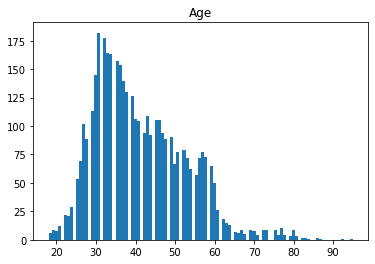

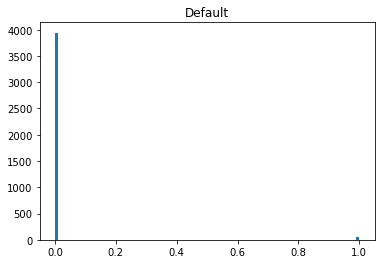

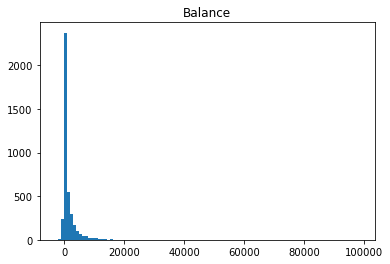

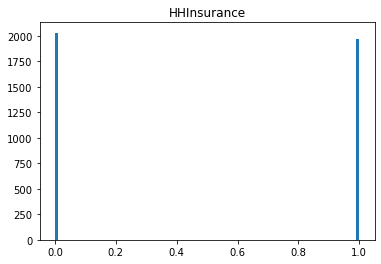

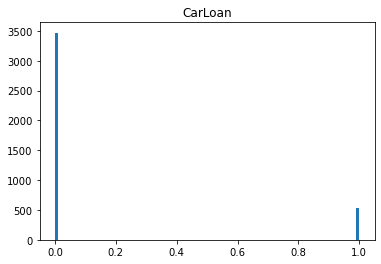

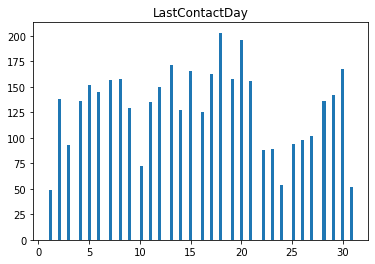

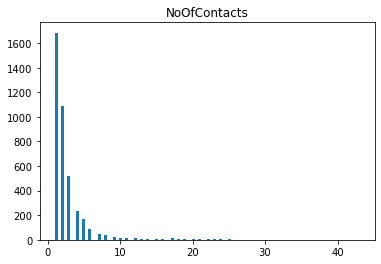

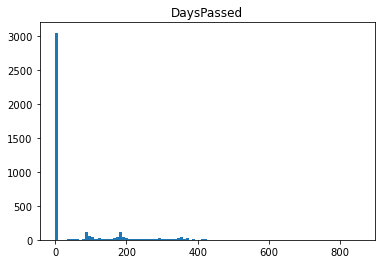

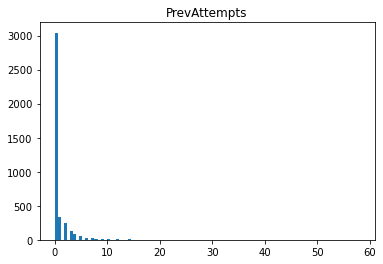

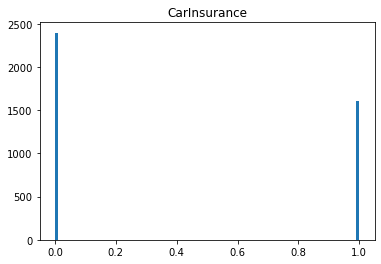

In [13]:
for i in df_num.columns:
    plt.hist(df_num[i],bins=100)
    plt.title(i)
    plt.show()

* Most clients are between 30 and 50 years old and they **don't have any credit in default**.

* Most clients **don't have a car loan** nor a **car insurance**.

* Approximately half of the clients their **households aren't insured**.

* <span style='background :yellow'>Before the compaign</span> the company usually **don't perform any contact** but during the compaing it has **at least performed one contact** for its clients.

* For the average yearly **balance** the data is **skewed** because there are a lot of extremes, there are a lot of people with little or no balance at all.

___
### 1.3.2. Categorical Variables <a name="132"></a>
___

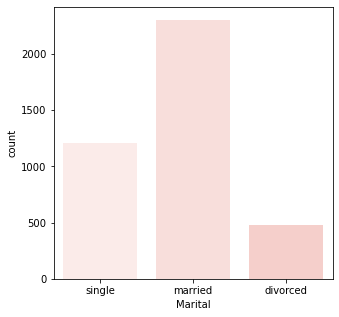

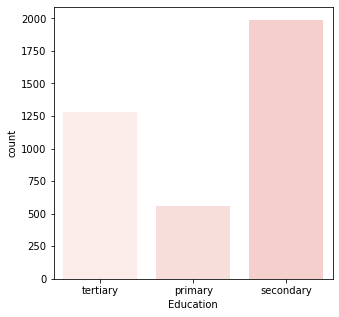

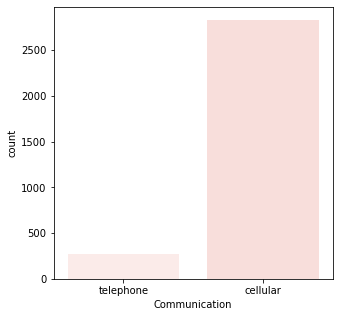

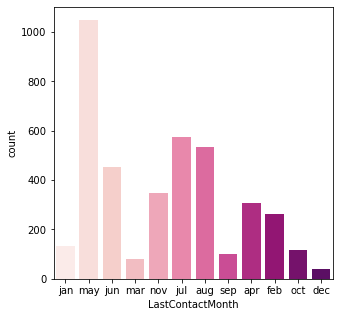

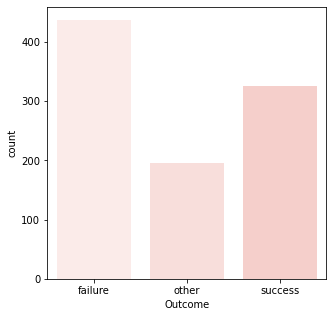

In [14]:
    sns.set_palette("RdPu", 12)
    for cat in ['Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']:
        plt.figure(figsize=(5,5))    
        sns.countplot(data=df_train, x=cat)


* Most customers work in the **management** sector,**married** and have **secondary education**. 

* For the Contact communication type,clients usually use **cellular** contact communication.

* Most of outcomes of the previous marketing campaign were a **failure**.(and there are many missing values)

* More than a quarter of customers were contacted in **May**.


_______________________________


# 2-OUTLIER ANALYSIS  <a name="2"></a> 
_______________________________
![](https://www.hdfcergo.com/images/default-source/car-lob/svg-img/boost-carimg.svg)


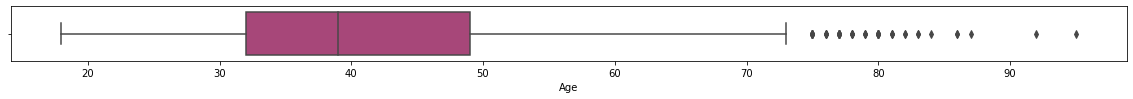

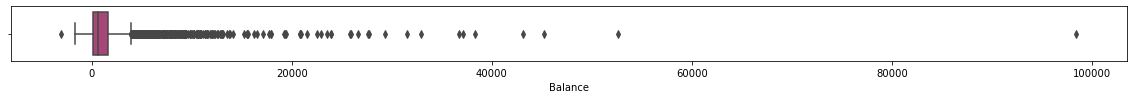

In [15]:
'''
boxplot is such a great visual way to discover outliers
and it use the turkey method (outlier are less than Q1-1.5IQR and greater than Q3+1.5IQR)

'''
sns.set_palette("RdPu", 2)
for cat in ['Age','Balance']:
    plt.figure(figsize=(20,1))    
    sns.boxplot(data=df_train, x=cat,palette='magma')
    

In [16]:
'''
the turkey method 

'''
for cat in ['Age','Balance']:
    Q3, Q1 = np.percentile(df_train[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    IQR = Q3 - Q1
    print('Interval:[', Q1 - 1.5*IQR,'&',Q3+ 1.5*IQR,']')
    print('min=',df_train[cat].min())
    print('max=',df_train[cat].max())
    
    n=((df_train[cat]>= (Q3+ 1.5*IQR)).sum())
    m=((df_train[cat]<= (Q1 - 1.5*IQR)).sum())
    print('pecentage of outliers(max):',n/df_train.shape[0])
    print('pecentage of outliers(min):',m/df_train.shape[0])
    


___________________________________________________
Age
___________________________________________________
Interval:[ 6.5 & 74.5 ]
min= 18
max= 95
pecentage of outliers(max): 0.013
pecentage of outliers(min): 0.0
___________________________________________________
Balance
___________________________________________________
Interval:[ -2151.0 & 3881.0 ]
min= -3058
max= 98417
pecentage of outliers(max): 0.09575
pecentage of outliers(min): 0.00025


In [17]:
'''
Statistical theory method 

'''
#here we are going to use Statistical theory to observe the outliers (diffrerent from Turkey method )    


for cat in ['Age','Balance']:
    Q3, Q1 = np.percentile(df_train[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    print('Q1=',Q1)
    print('Q3=',Q3)
    IQR = Q3 - Q1
    print('IQR:',IQR)
    print('Interval:[', df_train[cat].mean() - 3*IQR,'&',df_train[cat].mean() + 3*IQR,']')
    print('min=',df_train[cat].min())
    print('max=',df_train[cat].max())
    
    n=((df_train[cat]>= (df_train[cat].mean() + 3*IQR)).sum())
    m=((df_train[cat]<= (df_train[cat].mean() - 3)).sum())
    print('pecentage of outliers(max):',n/df_train.shape[0])
    print('pecentage of outliers(min):',m/df_train.shape[0])
    
    
    
    

___________________________________________________
Age
___________________________________________________
Q1= 32.0
Q3= 49.0
IQR: 17.0
Interval:[ -9.785249999999998 & 92.21475000000001 ]
min= 18
max= 95
pecentage of outliers(max): 0.00025
pecentage of outliers(min): 0.48625
___________________________________________________
Balance
___________________________________________________
Q1= 111.0
Q3= 1619.0
IQR: 1508.0
Interval:[ -2991.06275 & 6056.93725 ]
min= -3058
max= 98417
pecentage of outliers(max): 0.05225
pecentage of outliers(min): 0.74075


#### **Age**

* The clients that are older than 74 years represent outliers according to the *turkey method*; 
* The clients that are older than 92 years represent outliers according to the *statistical theory*.

* So, I will basically go with statistical theory and **remove only clients who are older than 92** because older people(60-80) represent a valid age range and we might not need to remove these from our dataset they are extremes, but not necessarily outliers.  But we can exclude very old people since we're talking about auto insurance because folks who are much older are uncommon in this sector.(in our dataset they are represent only 0.05%)

#### **Balance**

* As it expected the data of the average yearly balance is skewed because there are lot of extremes; so we are going to remove the values that **aren't included in** this interval [ -2991 ; 6056]. but after a simple calculation we can fin that the pecentage of removed client will reach 5% which's quite high.(at the moment we are just going to remove the very extreme values mi, and max)



In [18]:

df_rmout=df_train

df_rmout=df_rmout[(df_rmout.Age < 92)]
percentage_rm=(df_train.shape[0]-df_rmout.shape[0])/df_train.shape[0]
print('the percentage of removed data:',(percentage_rm*100))

df_rmout2=df_rmout
df_rmout2=df_rmout2[(df_rmout2.Balance <= 6056.93725)&(df_rmout2.Balance > -2991.06275)]
percentage_rm=(df_train.shape[0]-df_rmout2.shape[0])/df_train.shape[0]
print('the percentage of removed data:',(percentage_rm*100))


df_rmout=df_rmout[(df_rmout.Balance <df_rmout.Balance.max())&(df_rmout.Balance>df_rmout.Balance.min() )]
df_rmout.shape
df_train=df_rmout

'''
df_rmout=df_train
df_rmout=df_rmout[(df_rmout.Age < 92)]
df_train=df_rmout
'''

the percentage of removed data: 0.05
the percentage of removed data: 5.3


'\ndf_rmout=df_train\ndf_rmout=df_rmout[(df_rmout.Age < 92)]\ndf_train=df_rmout\n'

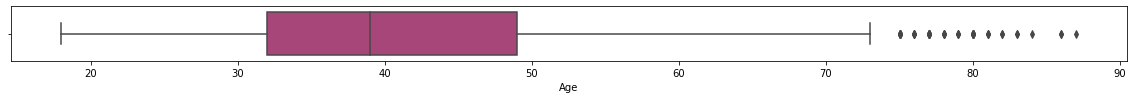

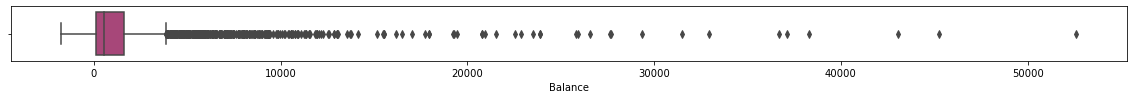

In [19]:

for cat in ['Age','Balance']:
    plt.figure(figsize=(20,1))    
    sns.boxplot(data=df_rmout, x=cat,palette='magma')


_______________________________



# 3-HANDLING MISSING VALUES  <a name="3"></a> 
_______________________________

<p align="center"> 
    <img src="https://images.ctfassets.net/uwf0n1j71a7j/4DDXrhi37eG6vpQ6JCnsi0/aec4a890ae538993d167c061fe899449/car-insurance-shield-generic-cover-protect-1200x550.png" alt="drawing" width="800"/> </p>


<AxesSubplot:ylabel='Id'>

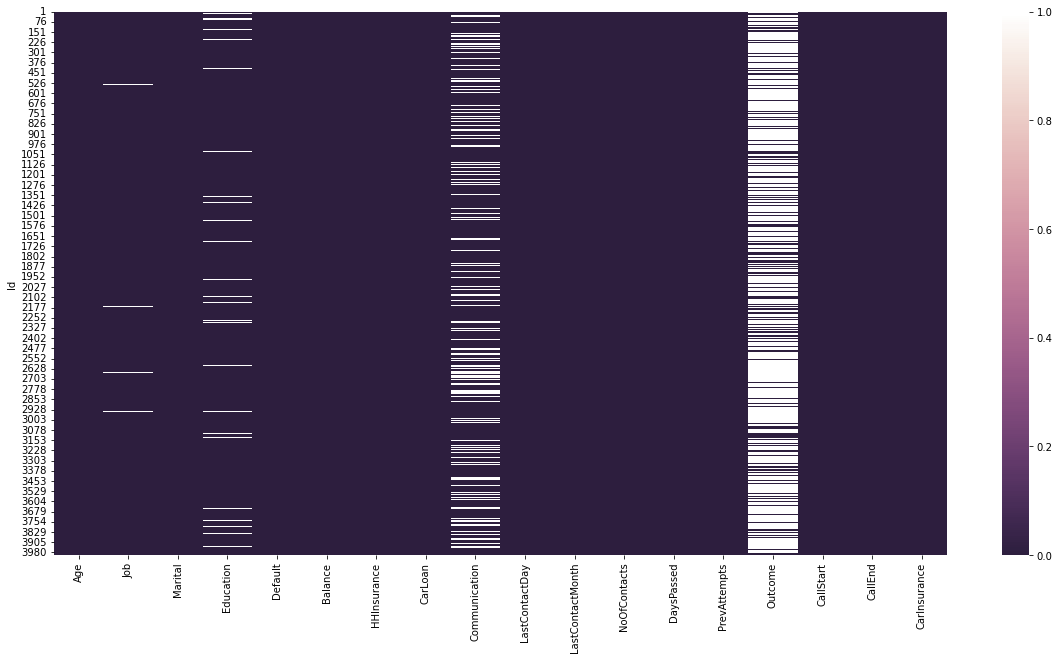

In [20]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_train.isnull(), cmap=cmap)

In [21]:
total = df_train.isnull().sum()
percentage = (total/df_train.isnull().count()).round(4)*100
NAs = pd.concat([total,percentage],axis=1,keys=('Total','Percentage'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentage
Outcome,3038,76.03
Communication,902,22.57
Education,168,4.20
Job,19,0.48


* For education and job the missing values are very few ,so we will impute them using backfill/frontfill pad method in python. 
* Outcome have a lot of missing values ,we will impute them using “None” for NaN values(76% and 22%) 
* Job and Education have relatively low number of missing values so I will use ffill; same thing with communication since there is significant difference between cellular and telephone  



In [22]:
df_train['Job'] = df_train['Job'].fillna(method ='pad')
df_train['Education'] = df_train['Education'].fillna(method ='pad')
df_train['Communication'] = df_train['Communication'].fillna(method ='pad')
df_train['Outcome'] =df_train['Outcome'].fillna('None')

In [23]:
df_train.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [24]:
df_train.shape

(3996, 18)

_______________________________



# 4.CORRELATION  <a name="4"></a> 
_______________________________
## 4.1. Pearson's correlation <a name="41"></a> 
_______________________________

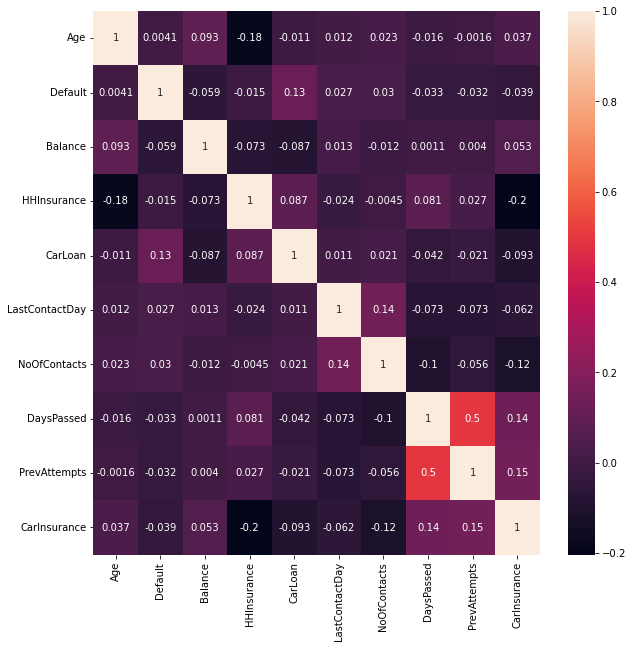

In [25]:
#Pearson's correlation

corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
sns.set_palette("RdPu", 2)
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True)

_______________________________
## 4.2. Spearman's correlation <a name="42"></a>
_______________________________

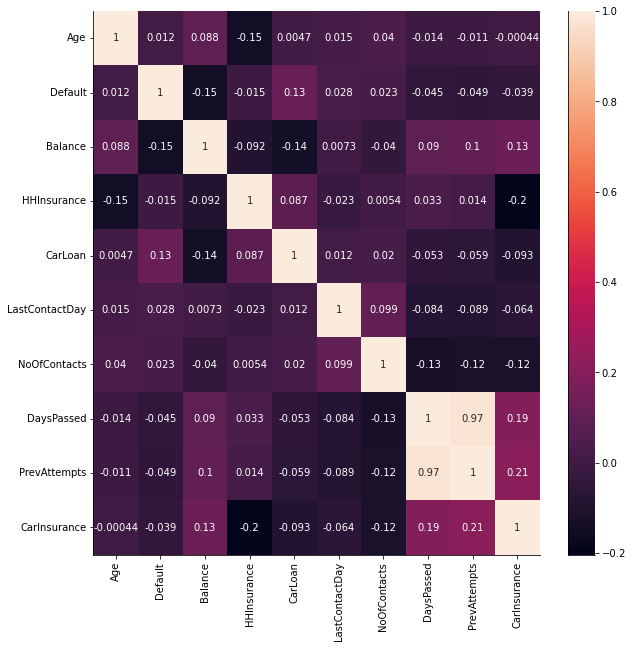

In [26]:
#Spearman's correlation
corr = df_train.corr(method='spearman')
sns.set_palette("RdPu", 2)
g = sns.heatmap(corr, annot=True)
sns.despine()
g.figure.set_size_inches(10,10)

* There is not much of a correlation among variables
* **DaysPassed and PrevAttempts** have a positive Correlation with each other;it indicate that a call center is a successful sales channel, and the balance indicates that    customers do repeat business.
* **HHiNSURANCE** is negatively correlated with the class(**CarInsurance**)

_______________________________



# 5-DATA VISUALIZATION  <a name="5"></a> 
_______________________________
## 5.1. Discrete Variables Visualization <a name="51"></a>

### <span style='background :yellow' > 5.1.1. Plots & Graphs </span> <a name="511"></a>
_______________________________


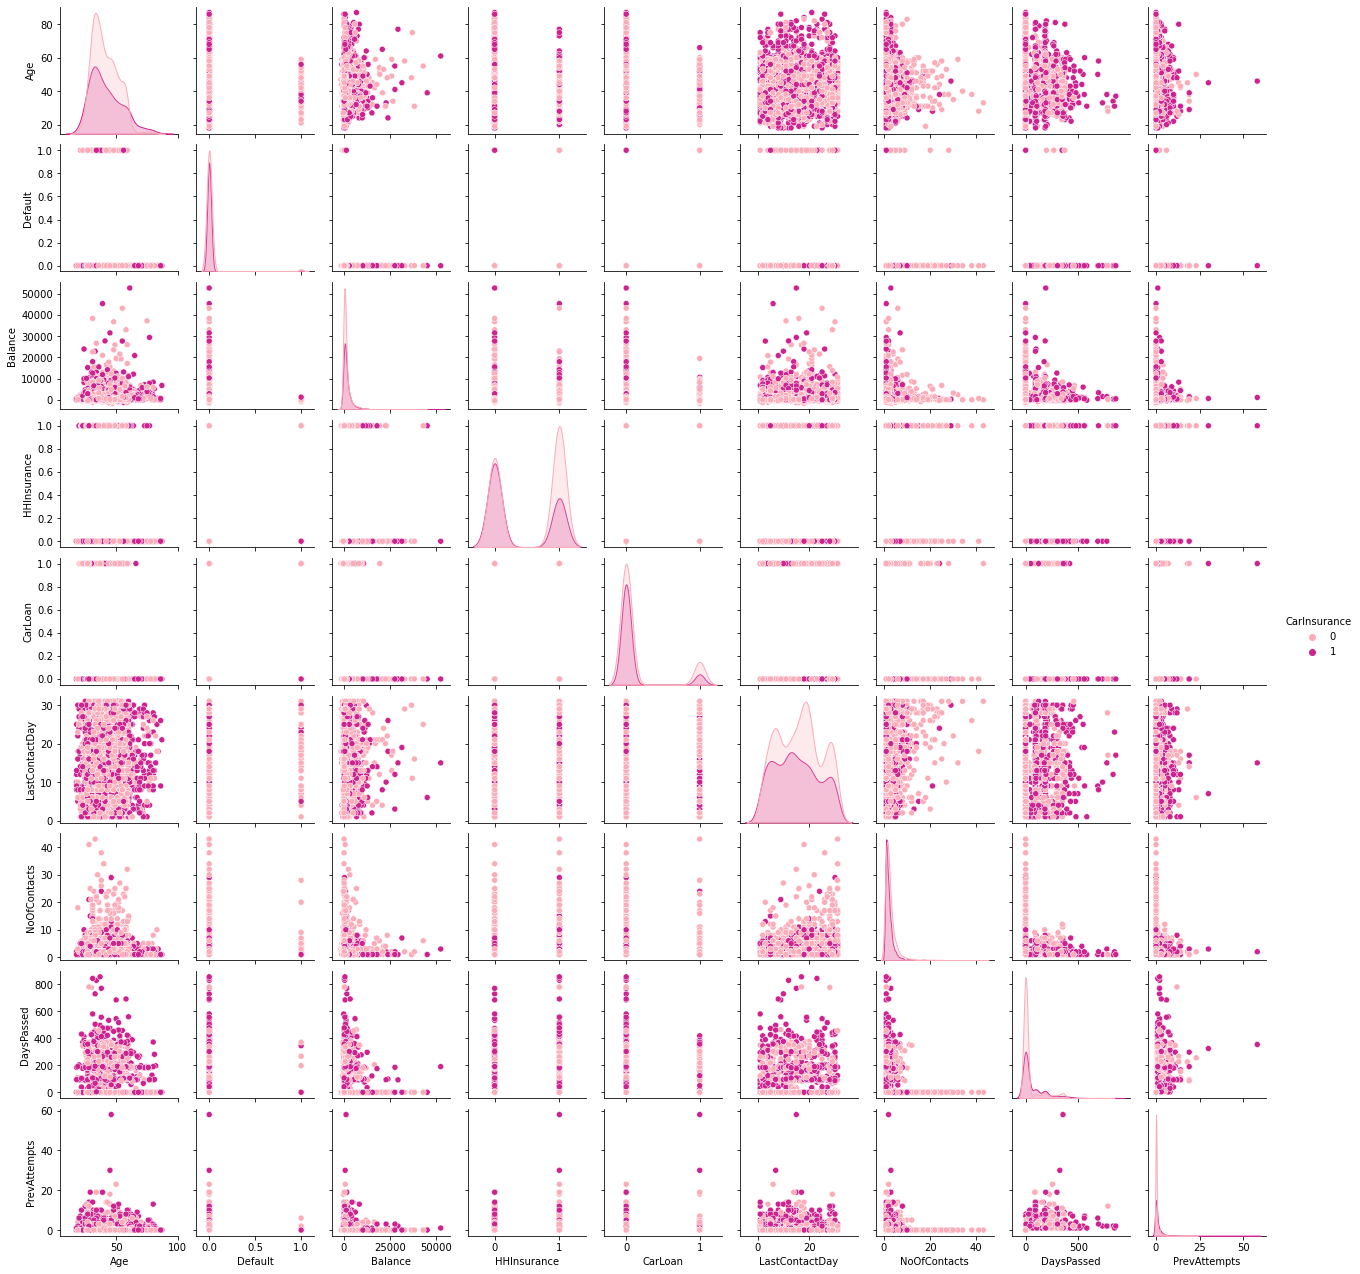

In [27]:
sns.set_palette("RdPu", 2)
sns.pairplot(df_train,hue='CarInsurance', height=2); 

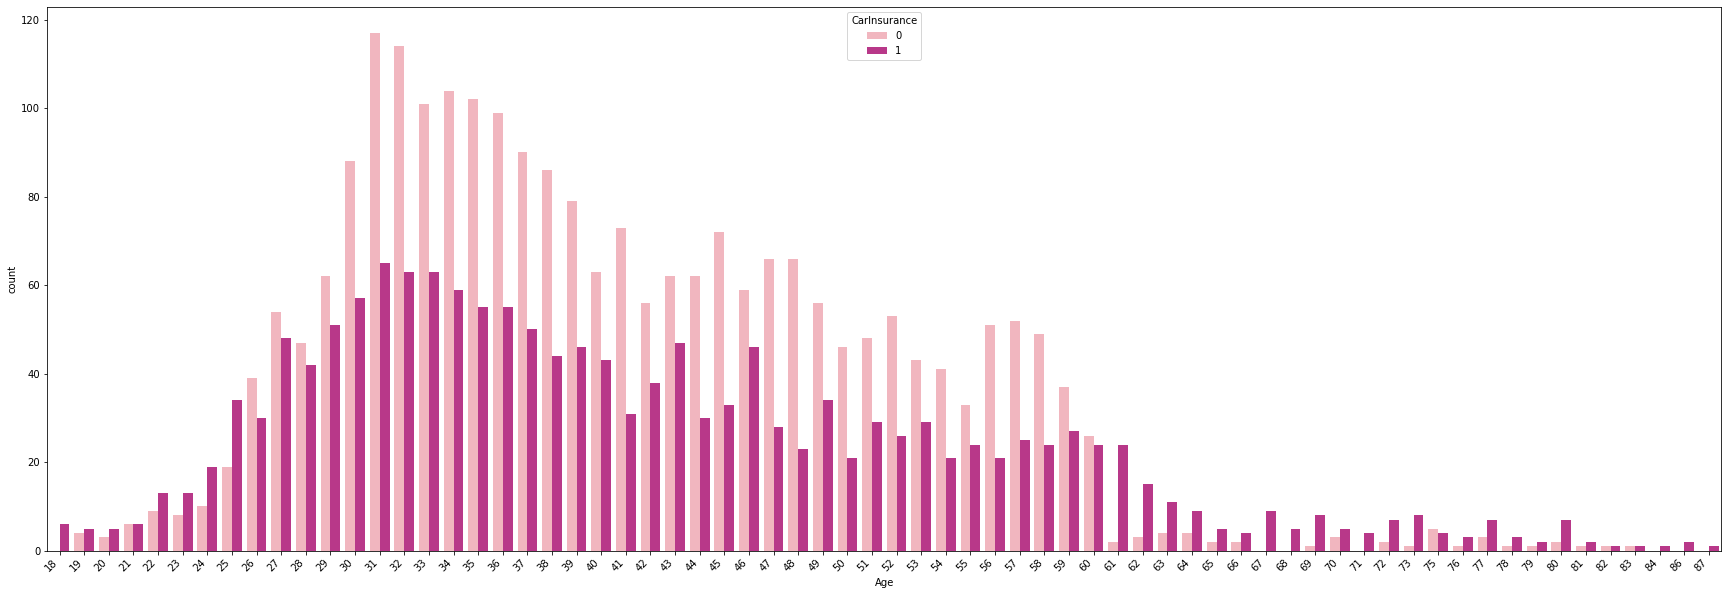

In [28]:
plt.figure(figsize=(30,10))
sns.set_palette("RdPu", 2)
PLOT = sns.countplot(x='Age', hue = 'CarInsurance', data=df_train)
barchart1 = PLOT.set_xticklabels(
    PLOT.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

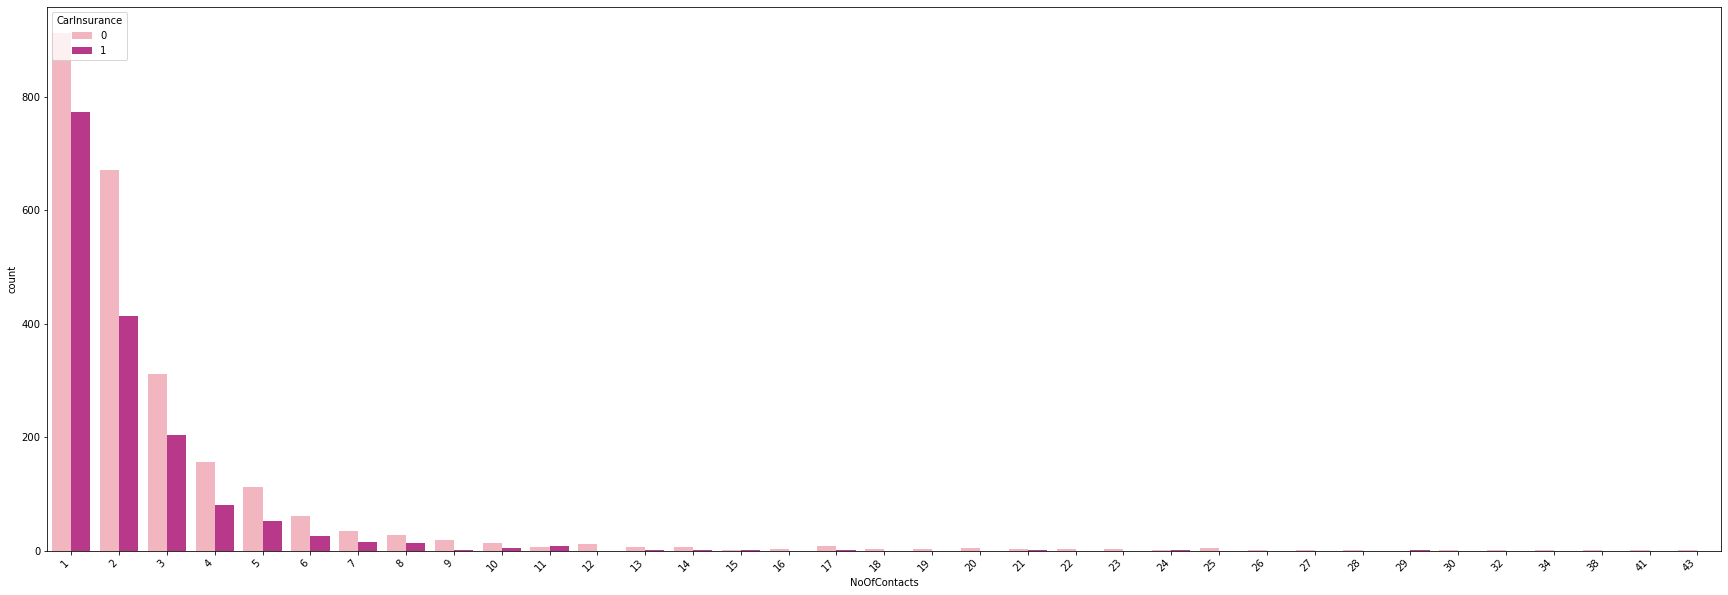

In [29]:
plt.figure(figsize=(30,10))
sns.set_palette("RdPu", 2)
PLOT = sns.countplot(x='NoOfContacts', hue = 'CarInsurance', data=df_train)
barchart1 = PLOT.set_xticklabels(
    PLOT.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

<AxesSubplot:>

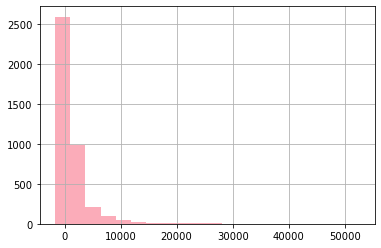

In [30]:
df_train['Balance'].hist(bins=20)

<AxesSubplot:>

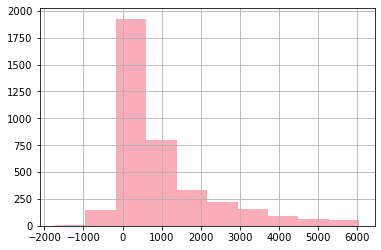

In [31]:
#let's try to create a copyset zith no outliers (turkey)
df_rmout_turkey=df_train
df_rmout_turkey=df_rmout_turkey[(df_rmout_turkey.Balance <= 6056.93725)&(df_rmout_turkey.Balance > -2991.06275)]
df_rmout_turkey['Balance'].hist(bins=10)


_______________________________
### <span style='background :yellow' > 5.1.2. Plot Interpretation </span> <a name="512"></a>

_______________________________

* Seniors people(**sexagenarian**, **septuagenarian** and **octogenarian** ) and also customers who are younger than 26 years old (students) are **more likely** to Buy Car Insurance.

* **Tricenarian** are **less interested** in buying car insurance(the count plot below is more clear)

* For DaysPassed ,the **more day passed** the **more people buy** a carInsurance(positive sign)

* Households insured are less likely to buy car insurance

* Carloans and HHInsurance have a direct relation with the customer buying behavior, clients who have Carloan are <span style='background :yellow' >less likely to buy </span> carInsurance; same thing with customers whose thier households insured .

* The more people have been less contacted the more people like to buy a carInsurance( <span style='background :yellow' > frequent contacts caused customer attrition)</span>



_______________________________
## 5.2. Categorical Variables Visualization<a name="52"></a>
_______________________________

###  <span style='background :yellow' > 5.2.1. Plots & Graphs </span><a name="521"></a>

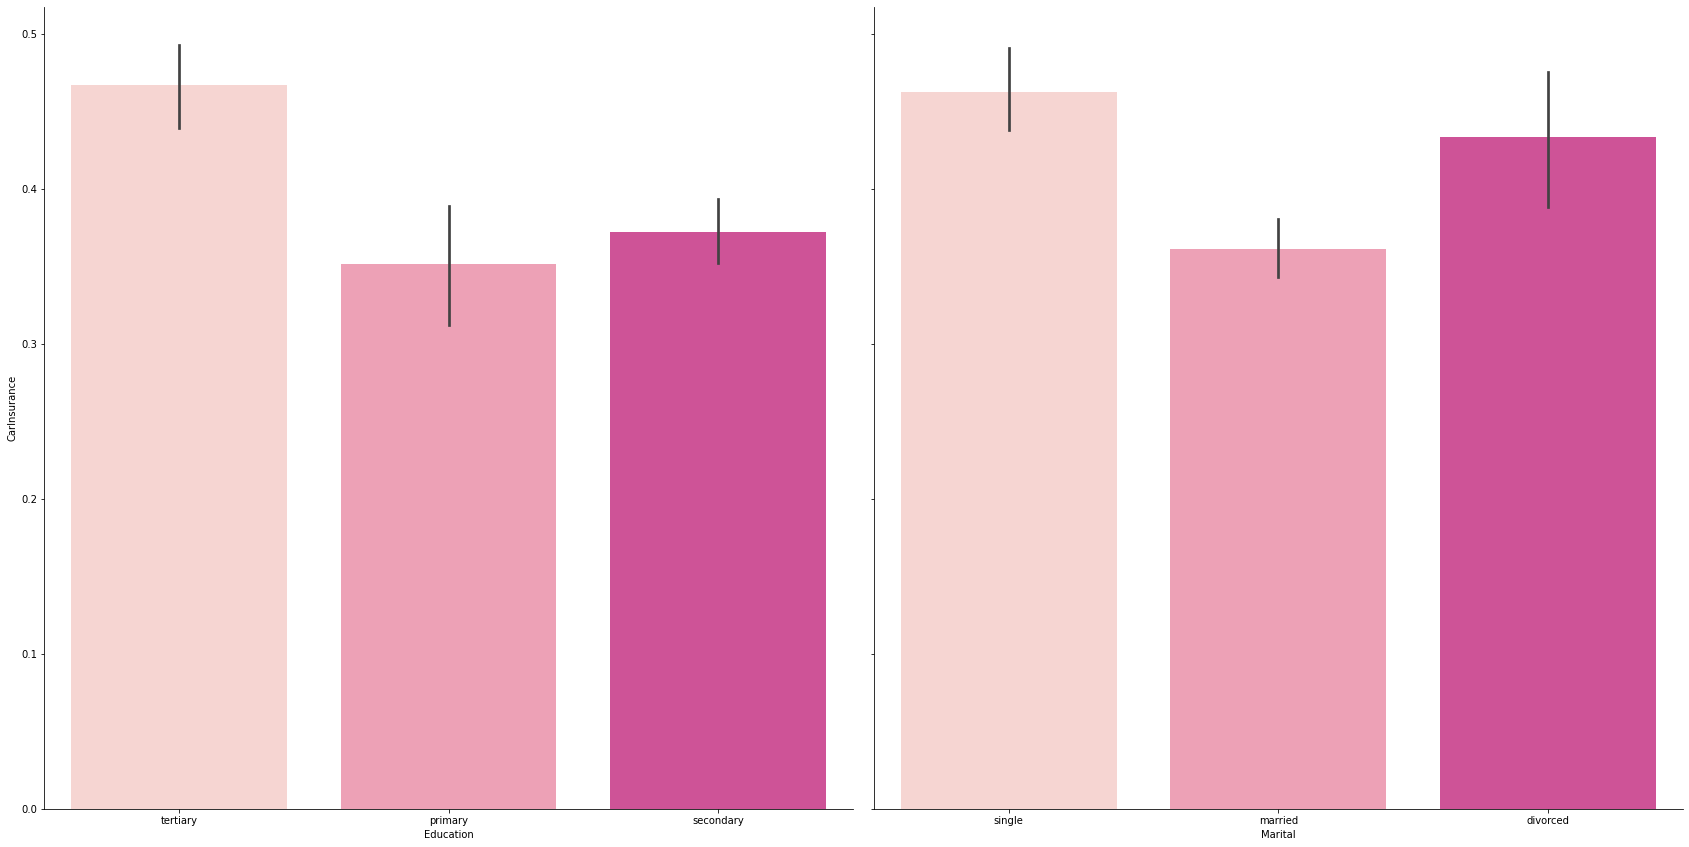

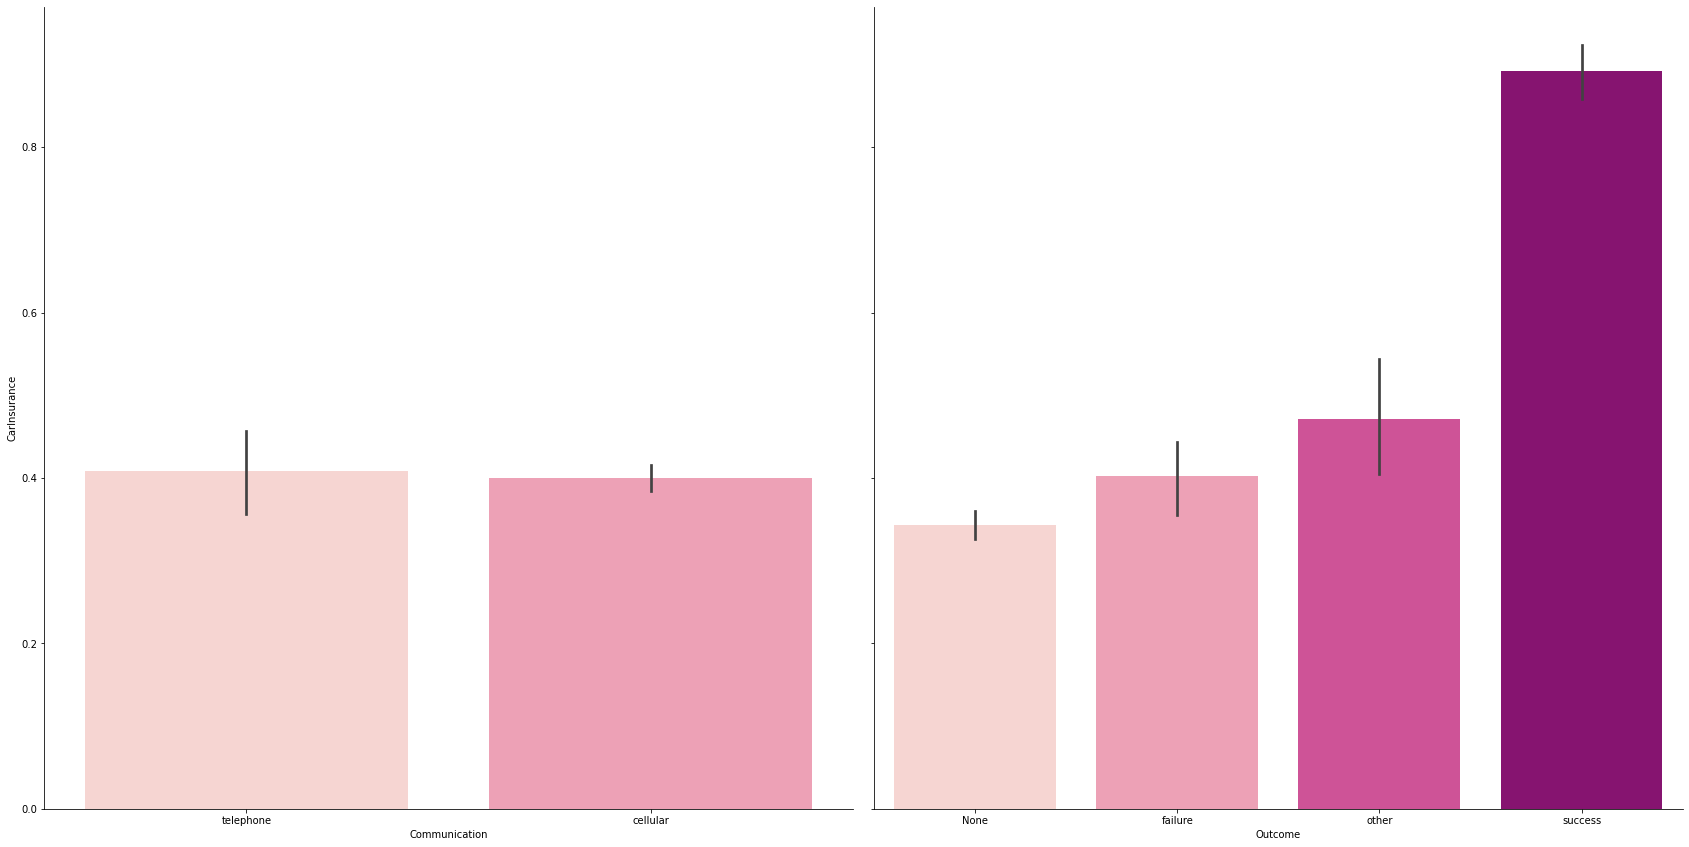

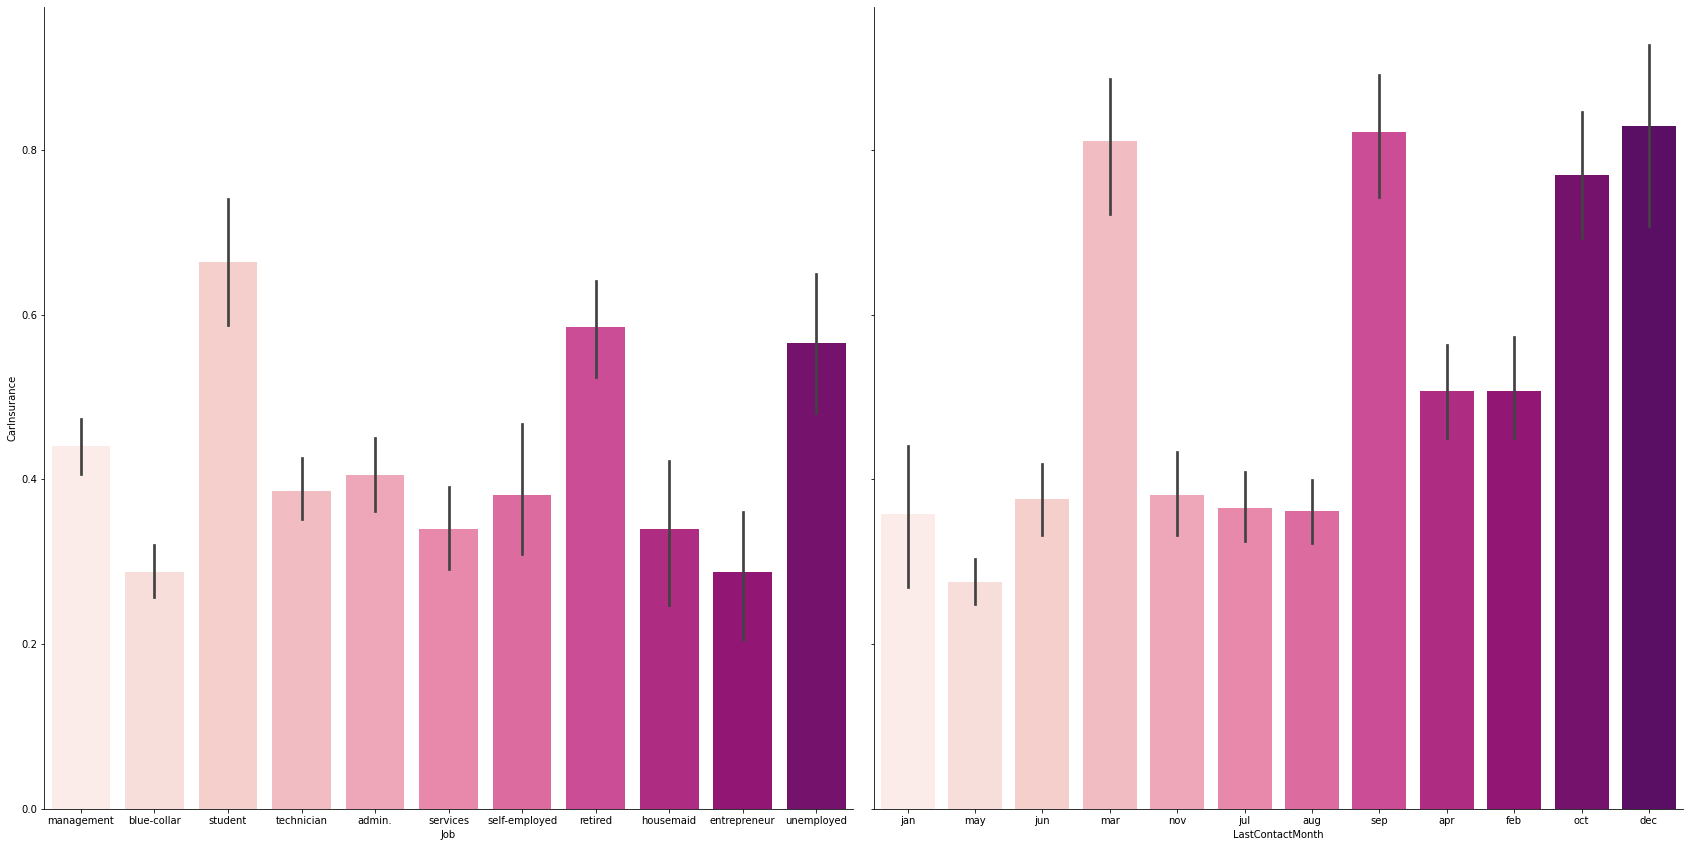

In [32]:
sns.set_palette("RdPu", 4)
Plot = sns.PairGrid(df_train,x_vars=["Education","Marital"],y_vars=["CarInsurance"],height=12)
Plot.map(sns.barplot);
Plot = sns.PairGrid(df_train,x_vars=["Communication","Outcome"],y_vars=["CarInsurance"],height=12)
Plot.map(sns.barplot);
sns.set_palette("RdPu", 12)
Plot = sns.PairGrid(df_train,x_vars=[ "Job","LastContactMonth"],y_vars=["CarInsurance"],height=12)
Plot.map(sns.barplot);


_______________________________
###  <span style='background :yellow' > 5.2.2 Plot Interpretation </span><a name="522"></a>
_______________________________

* **Retired** ,**students** and unemployed are most likely to buy car insurnace. 

* **Single and divorced** cutomers tend to buy car insurance more than married couples( <span style='background :yellow'>we can here suggest to the company to add some family insurance to increase the interest of this category</span>)

* Clients with **higher education** (tertiary) are more likely to buy car insurance.

* March, September, and December are the months when clients are more likely to buy car insurance. (<span style='background :yellow' >the beginning of school semester and the end of the year</span>)

_______________________________


In [33]:
df_train.to_csv('111clean_CarInsurance.csv', index=False)

# 6. FEATURE ENGINEERING <a name="6"></a>
_______________________________

In [34]:
df=df_train
df_train['AgeBand']=pd.cut(df_train['Age'],4)
print(df_train['AgeBand'].value_counts())

df_train.loc[(df_train['Age']>=17) & (df_train['Age']<26),'AgeBin'] = 1
df_train.loc[(df_train['Age']>=26) & (df_train['Age']<40),'AgeBin'] = 2
df_train.loc[(df_train['Age']>=40) & (df_train['Age']<61),'AgeBin'] = 3
df_train.loc[(df_train['Age']>=61) & (df_train['Age']<92),'AgeBin'] = 4
df_train['AgeBin'] = df_train['AgeBin'].astype(int)

# Create balance groups
df_train['BalanceBand']=pd.cut(df_train['Balance'],5)
print(df_train['BalanceBand'].value_counts())
df_train.loc[(df_train['Balance']>=-3200) & (df_train['Balance']<17237),'BalanceBin'] = 1
df_train.loc[(df_train['Balance']>=17237) & (df_train['Balance']<37532),'BalanceBin'] = 2
df_train.loc[(df_train['Balance']>=37532) & (df_train['Balance']<57827),'BalanceBin'] = 3
df_train.loc[(df_train['Balance']>=57827) & (df_train['Balance']<78122),'BalanceBin'] = 4
df_train.loc[(df_train['Balance']>=78122) & (df_train['Balance']<98418),'BalanceBin'] = 5
df_train['BalanceBin'] = df_train['BalanceBin'].astype(int)

df_train = df_train.drop(['AgeBand','BalanceBand','Age','Balance'],axis=1)

(35.25, 52.5]      1760
(17.931, 35.25]    1521
(52.5, 69.75]       635
(69.75, 87.0]        80
Name: AgeBand, dtype: int64
(-1784.317, 9133.4]    3898
(9133.4, 19996.8]        75
(19996.8, 30860.2]       15
(30860.2, 41723.6]        5
(41723.6, 52587.0]        3
Name: BalanceBand, dtype: int64


In [35]:
df_train.head()

,Job,Marital,Education,Default,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,AgeBin,BalanceBin
Id,,,,,,,,,,,,,,,,,,
1,management,single,tertiary,0,1,0,telephone,28,jan,2,-1,0,None,13:45:20,13:46:30,0,2,1
2,blue-collar,married,primary,0,1,0,telephone,26,may,5,-1,0,None,14:49:03,14:52:08,0,2,1
3,management,single,tertiary,0,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,2,1
4,student,single,primary,0,1,0,cellular,11,may,2,-1,0,None,12:06:43,12:20:22,1,1,1
5,management,married,tertiary,0,0,0,cellular,3,jun,1,-1,0,None,14:35:44,14:38:56,0,2,1


In [36]:
df_train['CallStart'] =  pd.to_datetime(df_train['CallStart'], infer_datetime_format=True)
df_train['CallEnd'] =  pd.to_datetime(df_train['CallEnd'], infer_datetime_format=True)
df_train['Call'] = (df_train['CallEnd'] - df_train['CallStart']).dt.total_seconds()

In [37]:
df_train['CallDuration'] = pd.qcut(df_train['Call'], 5,labels = False)
del df_train['CallStart']
del df_train['CallEnd']
del df_train['Call']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 4000
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job               3996 non-null   object
 1   Marital           3996 non-null   object
 2   Education         3996 non-null   object
 3   Default           3996 non-null   int64 
 4   HHInsurance       3996 non-null   int64 
 5   CarLoan           3996 non-null   int64 
 6   Communication     3996 non-null   object
 7   LastContactDay    3996 non-null   int64 
 8   LastContactMonth  3996 non-null   object
 9   NoOfContacts      3996 non-null   int64 
 10  DaysPassed        3996 non-null   int64 
 11  PrevAttempts      3996 non-null   int64 
 12  Outcome           3996 non-null   object
 13  CarInsurance      3996 non-null   int64 
 14  AgeBin            3996 non-null   int32 
 15  BalanceBin        3996 non-null   int32 
 16  CallDuration      3996 non-null   int64 
dtypes: int32(2), i

In [38]:
df_train['CallDuration'].value_counts()

3    801
1    801
0    800
2    798
4    796
Name: CallDuration, dtype: int64

In [39]:
df_dummies = pd.get_dummies(df_train[['Job', 'Marital', 'Education', 'Communication', 'Outcome']], columns=['Job', 'Marital', 'Education', 'Communication', 'Outcome'])
df_final = pd.concat([df_train,df_dummies], axis=1)
df_final=df_final.drop(['Job','Marital','Education','Communication','LastContactMonth','Outcome'],axis=1)
df_final

,Default,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,AgeBin,BalanceBin,...,Marital_single,Education_primary,Education_secondary,Education_tertiary,Communication_cellular,Communication_telephone,Outcome_None,Outcome_failure,Outcome_other,Outcome_success
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,28,2,-1,0,0,2,1,...,1,0,0,1,0,1,1,0,0,0
2,0,1,0,26,5,-1,0,0,2,1,...,0,1,0,0,0,1,1,0,0,0
3,0,1,0,3,1,119,1,1,2,1,...,1,0,0,1,1,0,0,1,0,0
4,0,1,0,11,2,-1,0,1,1,1,...,1,1,0,0,1,0,1,0,0,0
5,0,0,0,3,1,-1,0,0,2,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0,1,0,25,1,40,2,1,2,1,...,1,0,0,1,1,0,0,1,0,0
3997,0,1,1,29,19,-1,0,0,3,1,...,0,0,1,0,1,0,1,0,0,0
3998,0,0,1,8,1,-1,0,0,2,1,...,1,0,1,0,1,0,1,0,0,0


___

# 7. MODEL DEVELOPMENT<a name="7"></a>
_______________________________
## 7.1. Classification Algorithms<a name="71"></a>
___

In [40]:
y=df_final['CarInsurance'].values
dff=df_final.drop(['CarInsurance'],axis=1)
X= dff.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

In [41]:
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Success','Failure']

Random Forest Accuracy is 0.82
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       479
           1       0.78      0.79      0.78       321

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.83      0.82      0.83       800



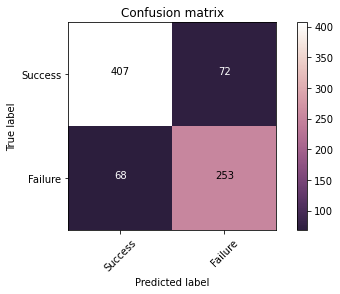

In [42]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

AdaBoost Accuracy= 0.83
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       479
           1       0.84      0.72      0.78       321

    accuracy                           0.83       800
   macro avg       0.83      0.81      0.82       800
weighted avg       0.83      0.83      0.83       800



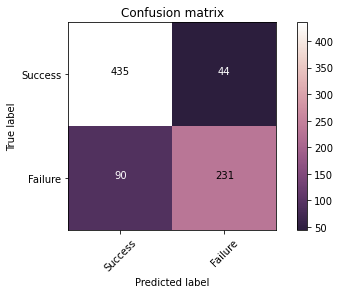

In [43]:
#AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("AdaBoost Accuracy= %2.2f" % accuracy_score(y_test,ada.predict(X_test)))
score_ada = cross_val_score(ada, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Marix for AdaBoost
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

___
## 7.2. Features Importance<a name="72"></a>
___
Finding the important features can be useful to make decisions and conclusions. here we will use ExtraTreesClassifier to find the top 10 features.




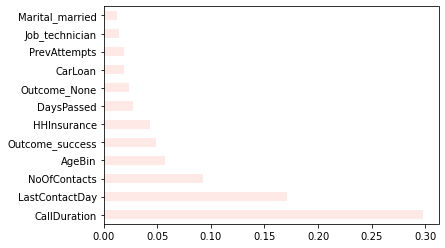

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=dff.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

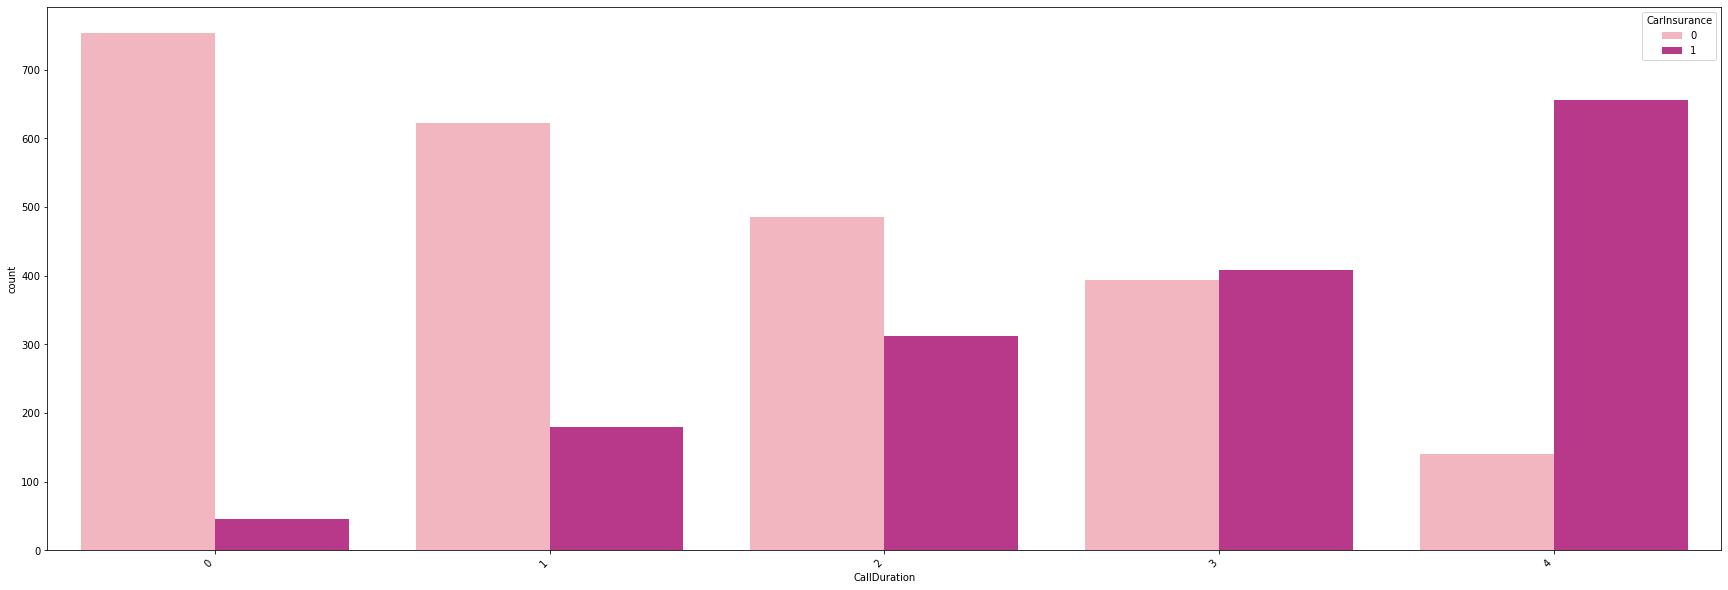

In [45]:
plt.figure(figsize=(30,10))
sns.set_palette("RdPu", 2)
PLOT = sns.countplot(x='CallDuration', hue = 'CarInsurance', data=df_final)
barchart1 = PLOT.set_xticklabels(
    PLOT.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

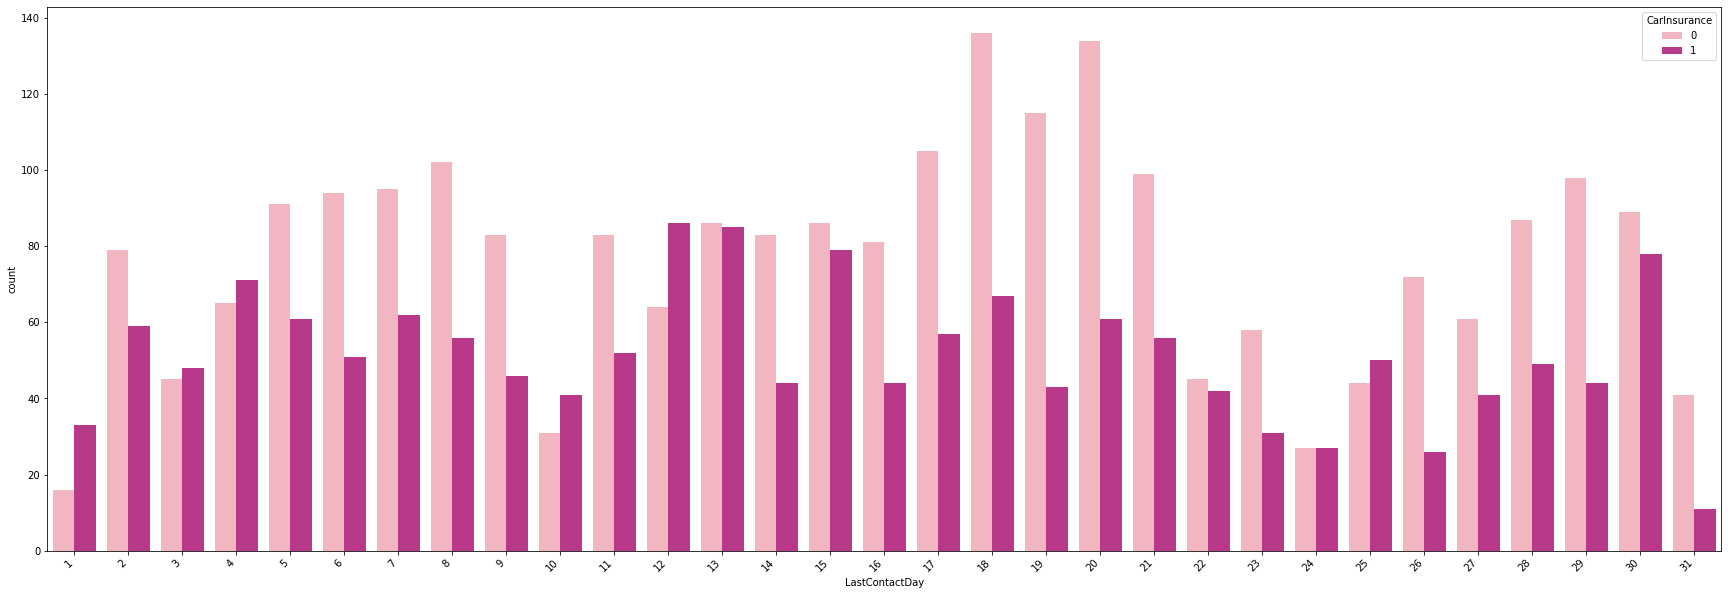

In [46]:
plt.figure(figsize=(30,10))
sns.set_palette("RdPu", 2)
PLOT = sns.countplot(x='LastContactDay', hue = 'CarInsurance', data=df_final)
barchart1 = PLOT.set_xticklabels(
    PLOT.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

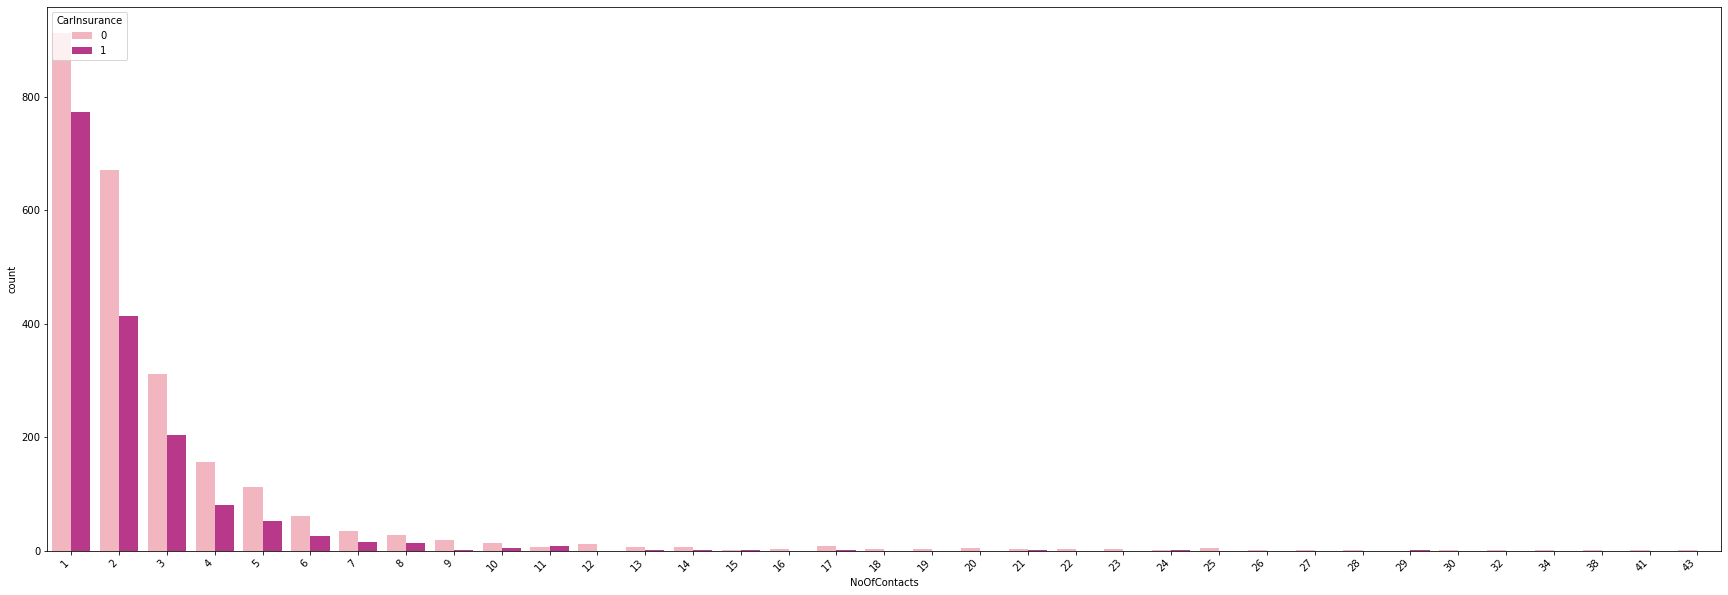

In [47]:
plt.figure(figsize=(30,10))
sns.set_palette("RdPu", 2)
PLOT = sns.countplot(x='NoOfContacts', hue = 'CarInsurance', data=df_final)
barchart1 = PLOT.set_xticklabels(
    PLOT.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

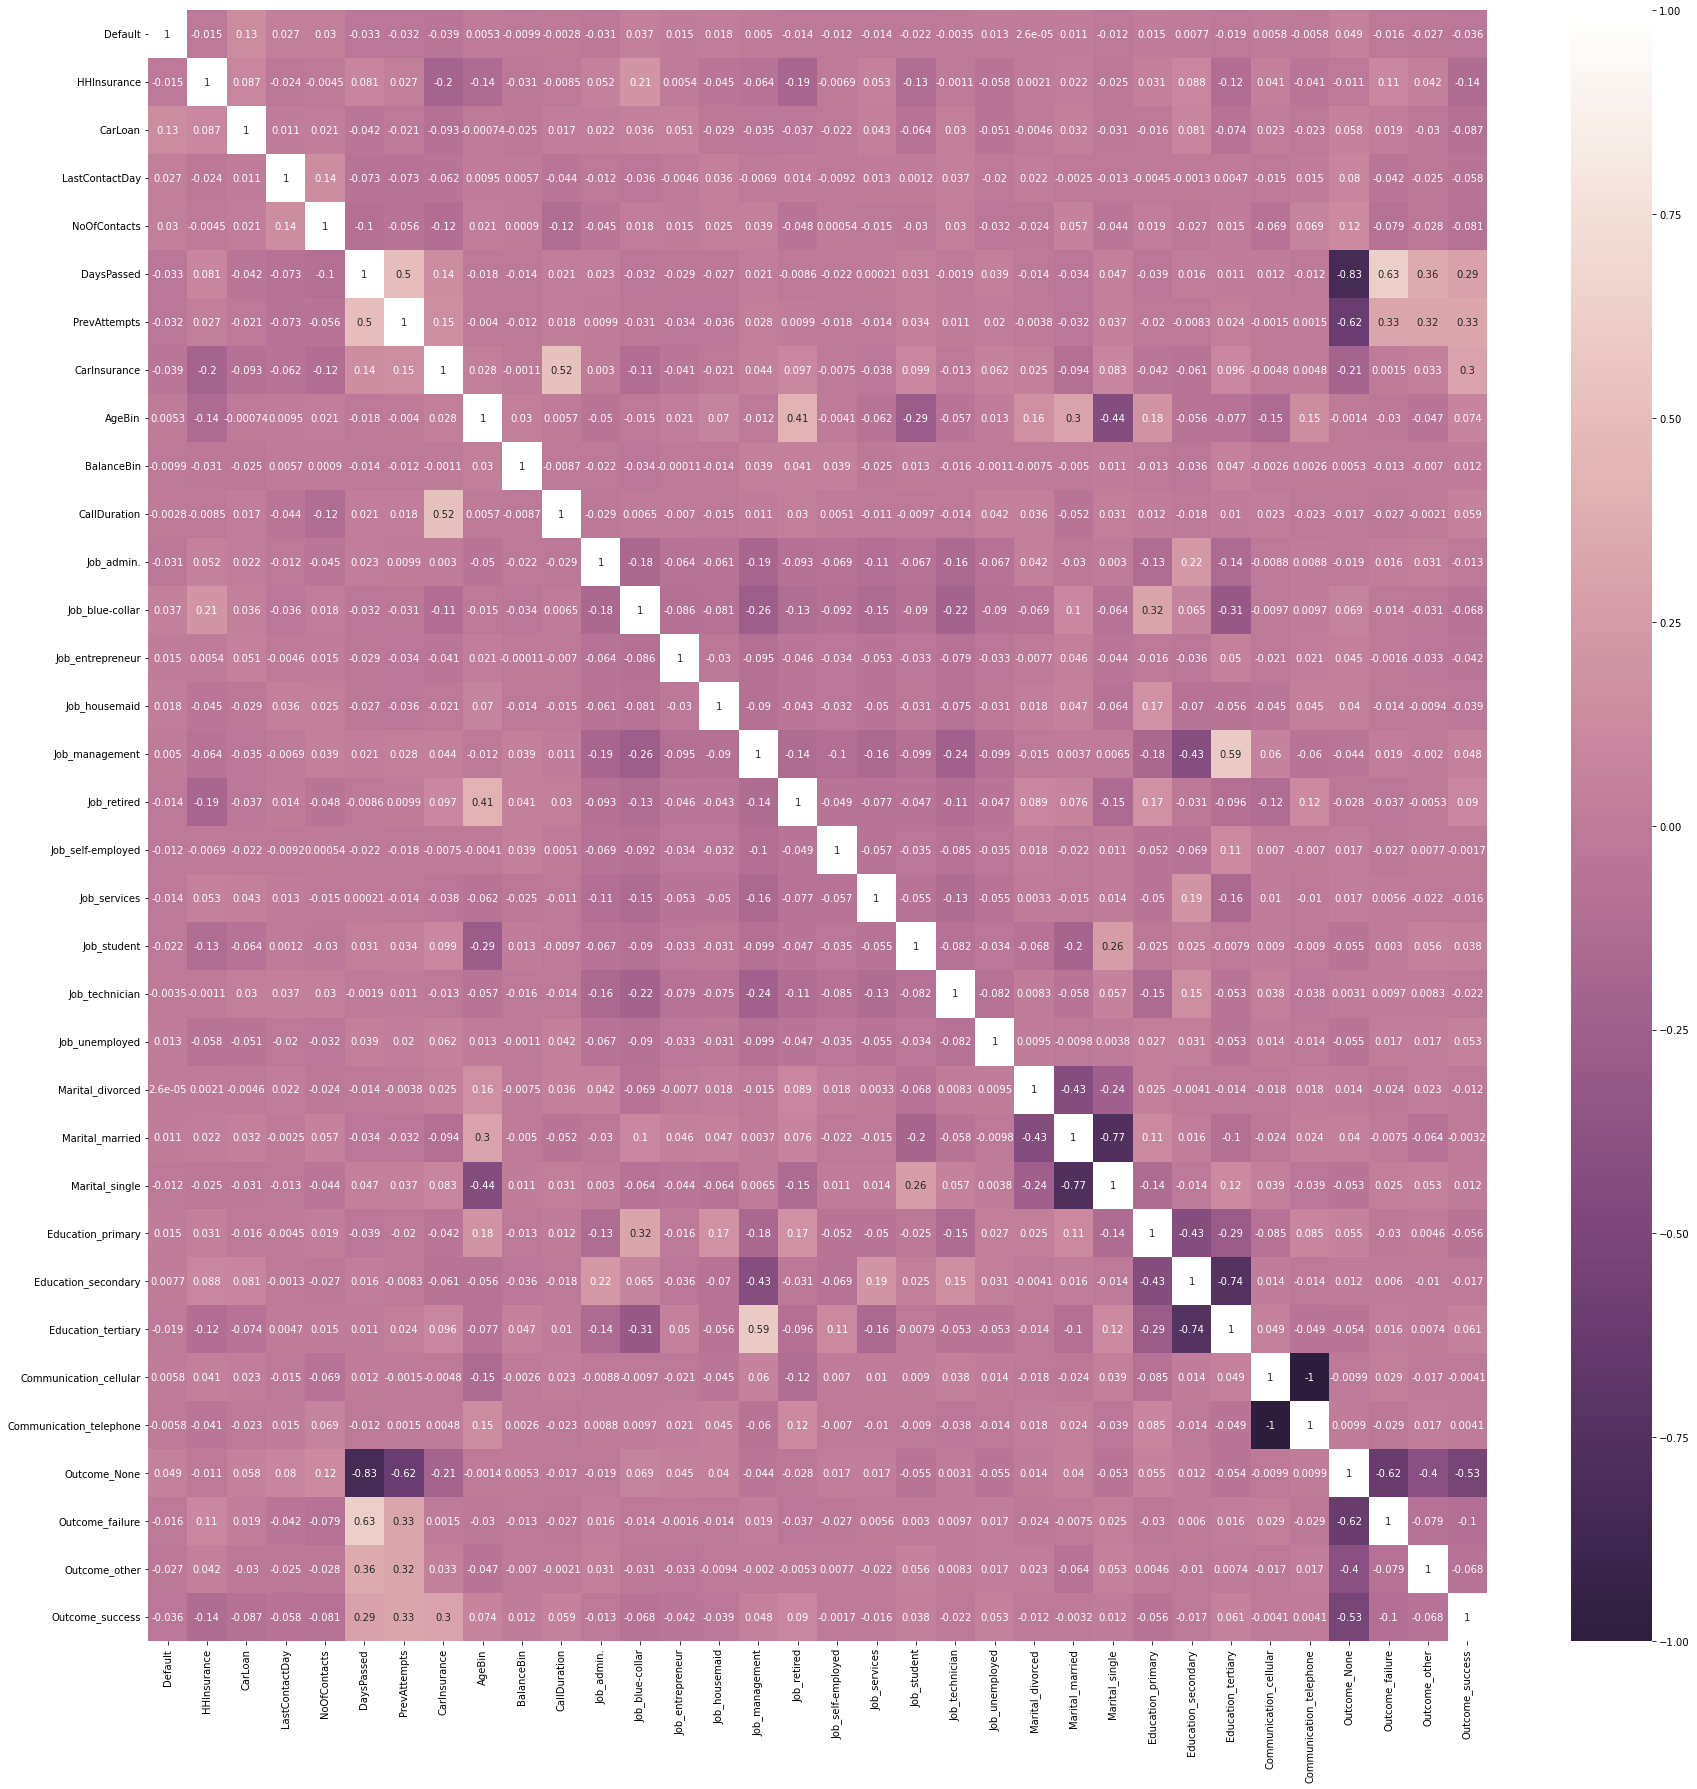

In [48]:
#Pearson's correlation

corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
g=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap=cmap)

In [49]:
df_final.reset_index(drop=True, inplace=True)
df_final.to_csv('clean_CarInsurance.csv', index=False)

___

# 8. FINAL INTERPRETATION<a name="8"></a>
_______________________________

* Now we can clearly see that **call duration** is a significant sign of cold call success and that makes sense because customers who are interested in buying car insurance tend to make longer discussions with buyers. 

* "Dayspassed" has a strong correlation with **outcome failure**, the more days passed from the last contact from a previous campaign the more the outcome of the campaign tends to be a failure. So the **previous campaign** outcome success is also a major factor.The same thing with NoofContacts and LastContactDay; the Customer's Balance also plays a role.


* In the following, we set the keys insights of High-values customers with some insightful suggestion to improve the business:

<p align="center"> 
    <img src="https://static.wixstatic.com/media/fbd1be_43cc387e2b8c417d9ff236d88a271d3c~mv2.gif/v1/fill/w_512,h_512,al_c,q_90/file.jpg
" alt="drawing" width="300"/> </p>


## <span style='background :yellow'>8.1. Target Clients</span><a name="81"></a>


* Seniors people(**sexagenarian**, **septuagenarian** and **octogenarian** ) and also customers who are younger than 26 years old (students) are **more likely** to Buy Car Insurance.

* **Retired** ,**students** and Clients with **higher education** (tertiary) are most likely to buy car insurnace. 

* **Tricenarian** are **less interested** in buying car insurance.

* **Single and divorced** cutomers tend to buy car insurance more than married couples(married cutomers could be more intrested in family insurance.)


* March, September, and December are the months when clients are more likely to buy car insurance.(<span style='background :yellow' >the beginning of school semester and the end of the year</span>)


* For DaysPassed ,the **more day passed** the **more people buy** a carInsurance(positive sign)

* Carloans and HHInsurance have a direct relation with the customer buying behavior, clients who have Carloan are <span style='background :yellow' >less likely to buy </span> carInsurance; same thing with customers whose thier households insured .

## <span style='background :yellow'>8.2. Insightful Suggestions</span><a name="82"></a>

* The Company should hire **qualified** employees who have extensive skills in **negotiation and dealing**.

* It's crucial to **keep in touch** with a client after a cold call, but frequent calls could cause **customer attrition**.

* The utmost concern can be given to the **older** age groups and also **younger** ones(students).

* Clients who responded from **previous campaigns** are more likely to purchase Car Insurance.

* Since married customers are less interested in purchasing insurance, the company could add some **family insurance** types to increase the interest of this category.

* Another effective suggestion is to hold more **campaigns** during **the beginning of the school semester** and **the end of the year**.